In [1]:
import operator
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# this allows plots to appear directly in the notebook %matplotlib inline
import os, sys
import random
import sklearn

#from sklearn import cross_validation

In [2]:
data = pd.read_csv('C:\\MSIS Sem 2\\DSMT - Assignment 3\\featuredEngineering - Copy.csv')

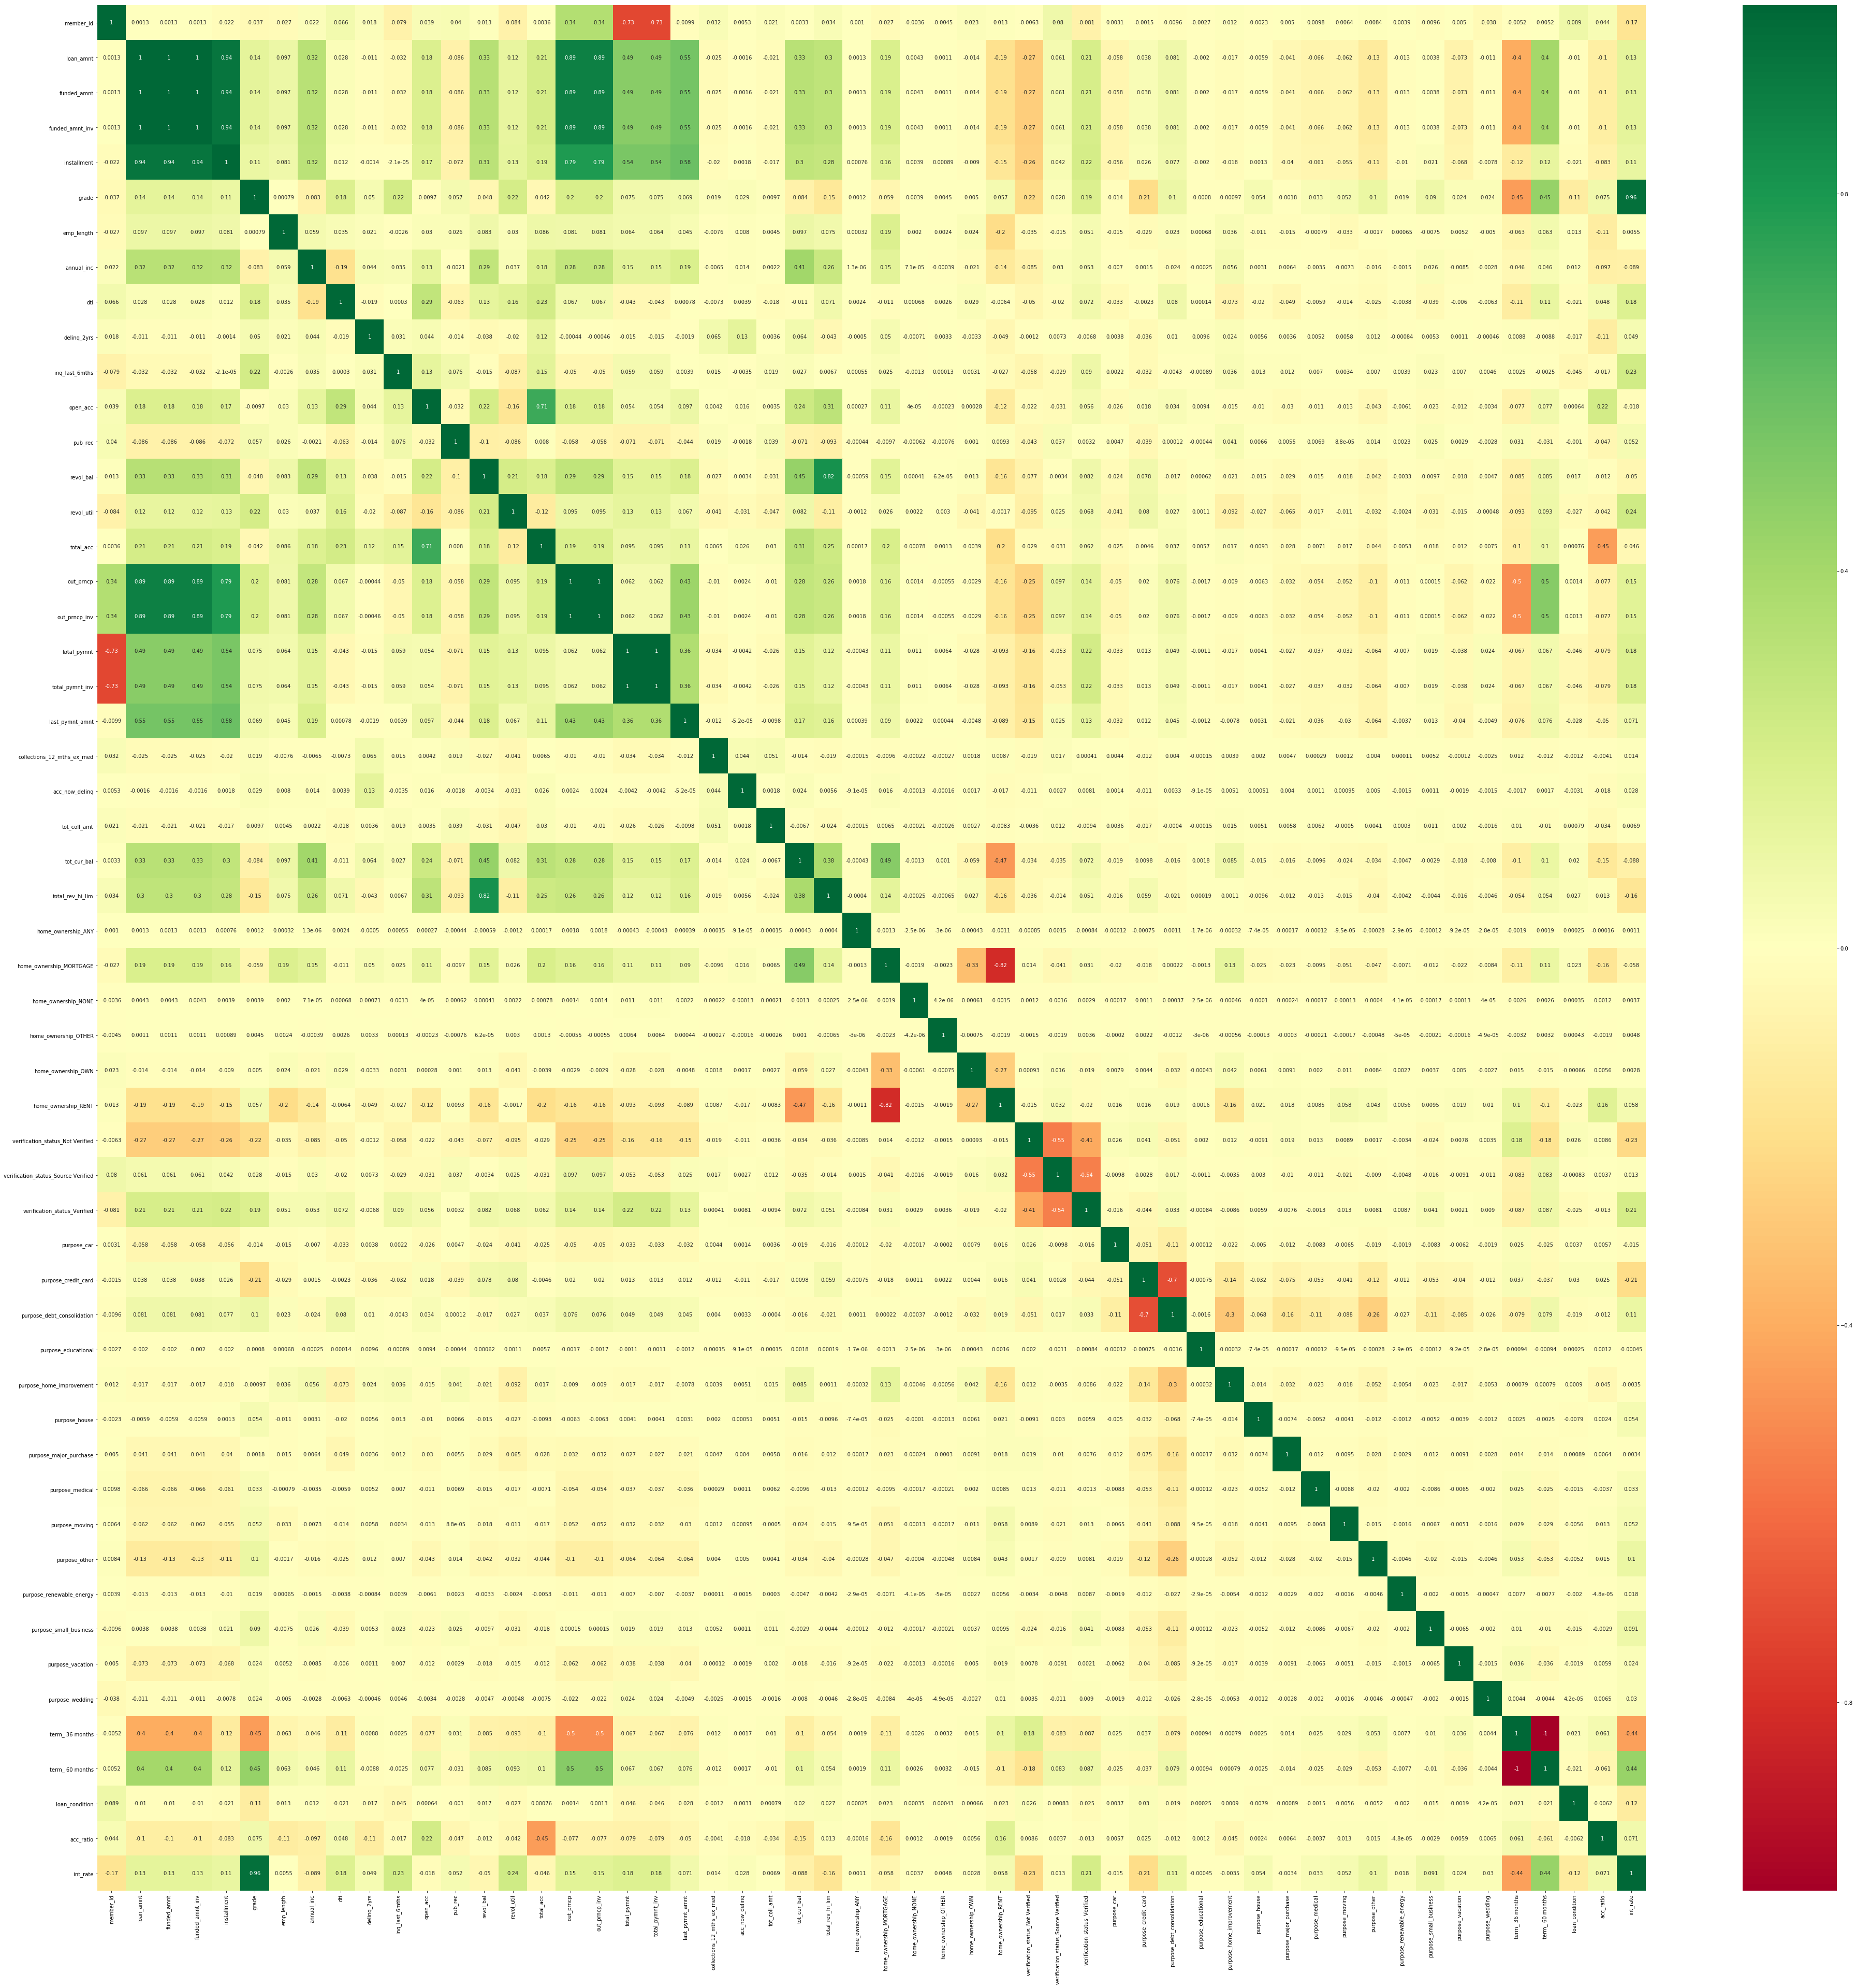

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\MSIS Sem 2\\DSMT - Assignment 3\\featuredEngineering - Copy.csv")
X = data.iloc[:,0:67]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(67,67))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv("C:\\MSIS Sem 2\\DSMT - Assignment 3\\featuredEngineering - Copy.csv")
X = data.iloc[:,0:53]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: Unknown label type: (array([10.99, 13.98,  6.62, ..., 15.99, 19.99, 11.99]),)

In [3]:
train, test = train_test_split(data, train_size = 0.8)

C:\Users\ihard\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
def calc_error(modelname, model, X_train, y_train, X_test, y_test):
        global error_metric
        y_train_predicted = model.predict(X_train)
        y_test_predicted = model.predict(X_test)
        
        #MAE, RMS, MAPE
        print(modelname,"mean_squared_error train : ",mean_squared_error(y_train, y_train_predicted))
        print(modelname,'mean_squared_error test : ',mean_squared_error(y_test, y_test_predicted))
        
        print(modelname,'mean_absolute_error train : ',mean_absolute_error(y_train, y_train_predicted))
        print(modelname,'mean_absolute_error : ',mean_absolute_error(y_test, y_test_predicted))
        
        print(modelname,'mean_absolute_percent_error train : ',np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100)
        print(modelname,'mean_absolute_percent_error test :',np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100)

In [26]:
X_train = train[['funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months',]]
y_train = train['int_rate']
X_test = test[['funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months',]]
y_test = test['int_rate']

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
calc_error('Regression', lr, X_train, y_train, X_test, y_test)
print('Regression completed')

Regression mean_squared_error train :  1.075265959110633
Regression mean_squared_error test :  1.0822879021757463
Regression mean_absolute_error train :  0.8551800956492375
Regression mean_absolute_error :  0.8581585047369521
Regression mean_absolute_percent_error train :  7.4063126645353865
Regression mean_absolute_percent_error test : 7.422956120076242
Regression completed


In [28]:
m1 = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 3.069e+06
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        02:17:22   Log-Likelihood:            -8.1539e+05
No. Observations:              461471   AIC:                         1.631e+06
Df Residuals:                  461457   BIC:                         1.631e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
funded_amnt                     -0.0090      0.001     -6.377      0.000      -0.012      -0.006
funded_amnt_inv                  0.0093      0.001      6.588      0.000       0.007       0.012
installment                     -0.0013   5.72e-05    -23.464      0.000      -0.001      -0.001
grade                            3.4986      0.002   1529.781      0.000       3.494       3.503
dti                              0.0459      0.000    191.977      0.000       0.045       0.046
inq_last_6mths                   0.2296      0.002     96.969      0.000       0.225       0.234
revol_util                       0.0209   8.71e-05    240.318      0.000       0.021       0.021
out_prncp                        0.0054      0.001      3.917      0.000       0.003       0.008
out_prncp_inv                   -0.0057      0.001     -4.100      0.000      -0.008      -0.003
total_pymnt                      0.0102      0.001      9.731      0.000       0.008       0.012
total_pymnt_inv                 -0.0103      0.001     -9.796      0.000      -0.012      -0.008
purpose_debt_consolidation       0.4322      0.004    102.620      0.000       0.424       0.440
verification_status_Verified     0.0888      0.005     18.328      0.000       0.079       0.098
term_ 60 months                 -0.0691      0.012     -5.821      0.000      -0.092      -0.046
==============================================================================
Omnibus:                     5451.802   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8592.810
Skew:                          -0.111   Prob(JB):                         0.00
Kurtosis:                       3.631   Cond. No.                     1.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)
calc_error('RandomForest', rf, X_train, y_train, X_test, y_test)